In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
#plt.title('테스트')

In [2]:
from model.synthpop import Synthpop
import numpy as np
import pandas as pd
import glob
from table_evaluator import load_data, TableEvaluator
import sdmetrics

In [3]:
#Data Load

raw = pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/캡스톤/data/rawdata.csv')

In [4]:
raw

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득
0,저소득층가구,78,중등,사별,단독,다가구용단독주택,자가,3300,0
1,일반가구,75,초등,사별,단독,다가구용단독주택,보증부월세,2868,2064
2,일반가구,81,대학,이혼,단독,일반단독주택,자가,1872,1200
3,일반가구,61,전문대,유배우,기타,다가구용단독주택,자가,6492,3216
4,저소득층가구,83,초등,사별,단독,일반아파트,비가구원명의주택,1020,324
...,...,...,...,...,...,...,...,...,...
7860,일반가구,42,전문대,유배우,기타,일반아파트,전세,4608,3630
7861,일반가구,46,대학,유배우,기타,일반아파트,자가,8580,5100
7862,일반가구,47,대학,유배우,기타,일반아파트,자가,7140,5500
7863,일반가구,48,대학,유배우,기타,일반아파트,전세,6744,10350


In [20]:
raw = raw.astype({'저소득층여부':'category',
                  '교육수준':'category',
                  "혼인상태": "category",
                  "가구형태": "category",
                  "주택유형": "category",
                  "주택점유형태": "category"})

In [21]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 0 to 7864
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   저소득층여부  7865 non-null   category
 1   나이      7865 non-null   int64   
 2   교육수준    7865 non-null   category
 3   혼인상태    7865 non-null   category
 4   가구형태    7865 non-null   category
 5   주택유형    7865 non-null   category
 6   주택점유형태  7865 non-null   category
 7   총생활비    7865 non-null   int64   
 8   총소득     7865 non-null   int64   
dtypes: category(6), int64(3)
memory usage: 232.3 KB


# Generate Data_Synthpop

In [27]:
# 변수 타입 지정, 'int', 'float', 'datetime', 'category', 'bool' 만 가능
my_dtypes = {"저소득층여부": "category",
 "나이": "int",
 "교육수준": "category",
 "혼인상태": "category",
 "가구형태": "category",
 "주택유형": "category",
 "주택점유형태": "category",
 "총생활비": "int",
 "총소득": "int"
}

spop = Synthpop()

In [28]:
my_dtypes

{'저소득층여부': 'category',
 '나이': 'int',
 '교육수준': 'category',
 '혼인상태': 'category',
 '가구형태': 'category',
 '주택유형': 'category',
 '주택점유형태': 'category',
 '총생활비': 'int',
 '총소득': 'int'}

In [29]:
spop.fit(raw, dtypes = my_dtypes)

train_저소득층여부
train_나이
train_교육수준
train_혼인상태
train_가구형태
train_주택유형
train_주택점유형태
train_총생활비
train_총소득


In [31]:
# Create synthetic data
nrow = len(raw)
synthetic_data = spop.generate(nrow)

generate_저소득층여부
generate_나이
generate_교육수준
generate_혼인상태
generate_가구형태
generate_주택유형
generate_주택점유형태
generate_총생활비
generate_총소득


In [32]:
synthetic_data

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득
0,일반가구,56,고등,유배우,기타,다가구용단독주택,자가,9744,4760
1,일반가구,81,초등,유배우,기타,일반단독주택,자가,4248,1440
2,일반가구,35,대학,미혼,기타,다세대주택,월세,4680,3360
3,저소득층가구,71,초등,유배우,기타,일반단독주택,자가,2664,1442
4,저소득층가구,84,무학,사별,단독,일반아파트,자가,1032,600
...,...,...,...,...,...,...,...,...,...
7860,저소득층가구,78,초등,사별,단독,일반단독주택,자가,1008,0
7861,저소득층가구,80,무학,유배우,기타,일반단독주택,자가,2556,0
7862,저소득층가구,45,고등,이혼,모자,다세대주택,자가,2520,2400
7863,일반가구,70,중등,유배우,기타,빌라,자가,6264,2403


# Visualize

In [41]:
raw = raw.astype({'저소득층여부':'object',
                  '교육수준':'object',
                  "혼인상태": "object",
                  "가구형태": "object",
                  "주택유형": "object",
                  "주택점유형태": "object"})

synthetic_data = synthetic_data.astype({'저소득층여부':'object',
                  '교육수준':'object',
                  "혼인상태": "object",
                  "가구형태": "object",
                  "주택유형": "object",
                  "주택점유형태": "object"})

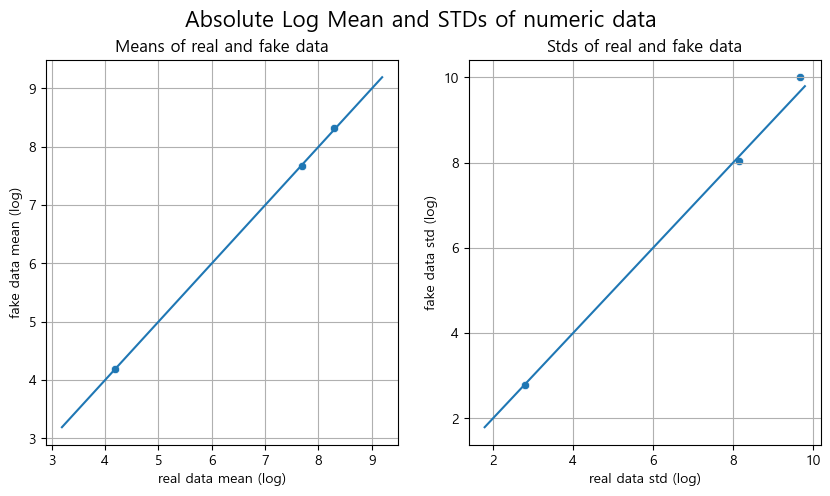

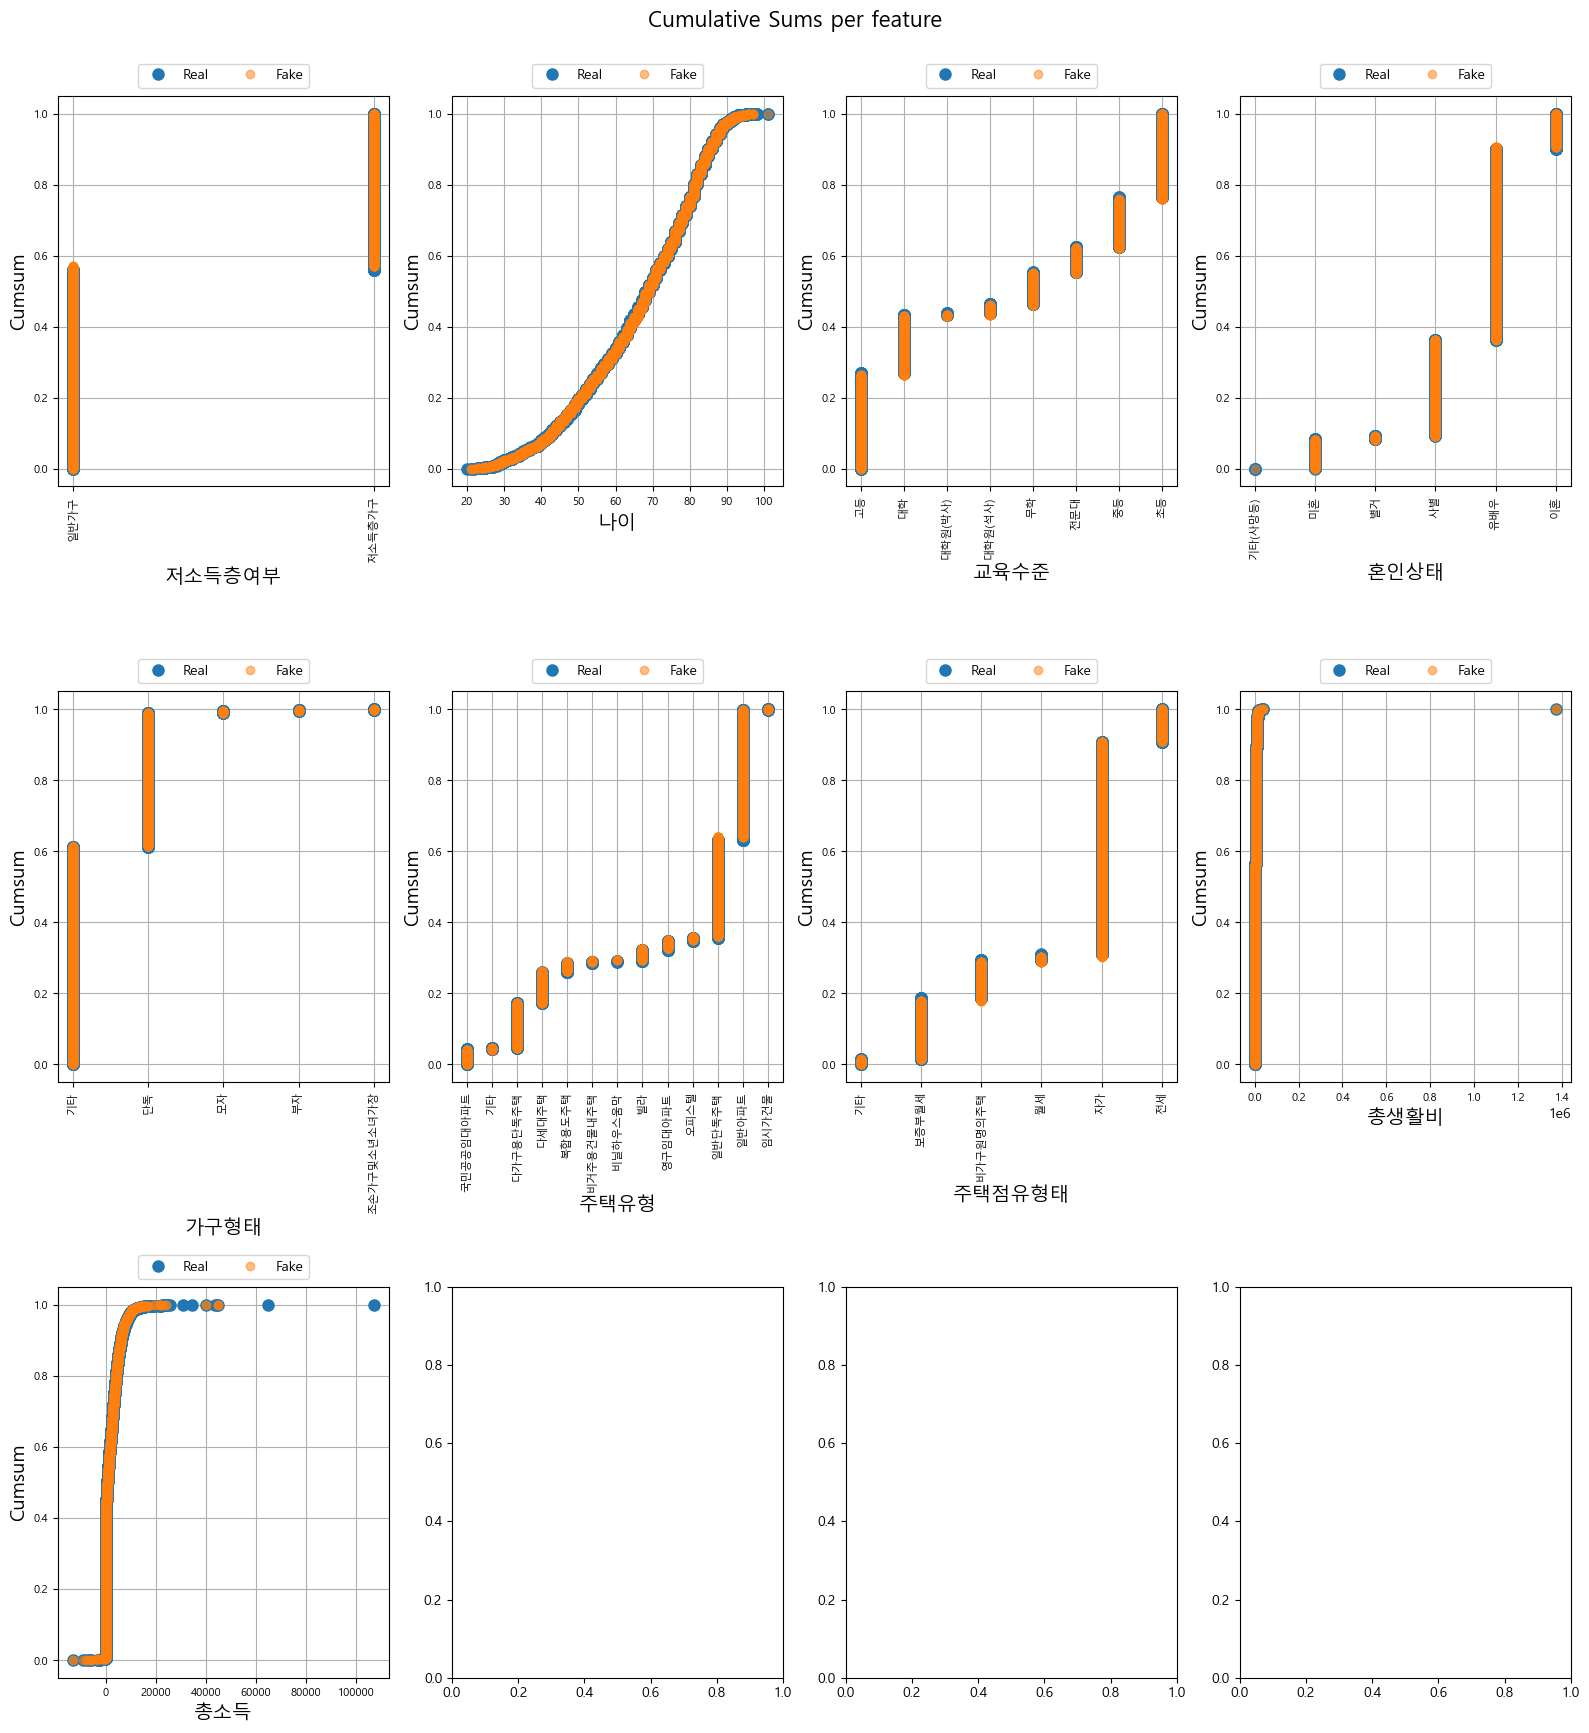

C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of tick

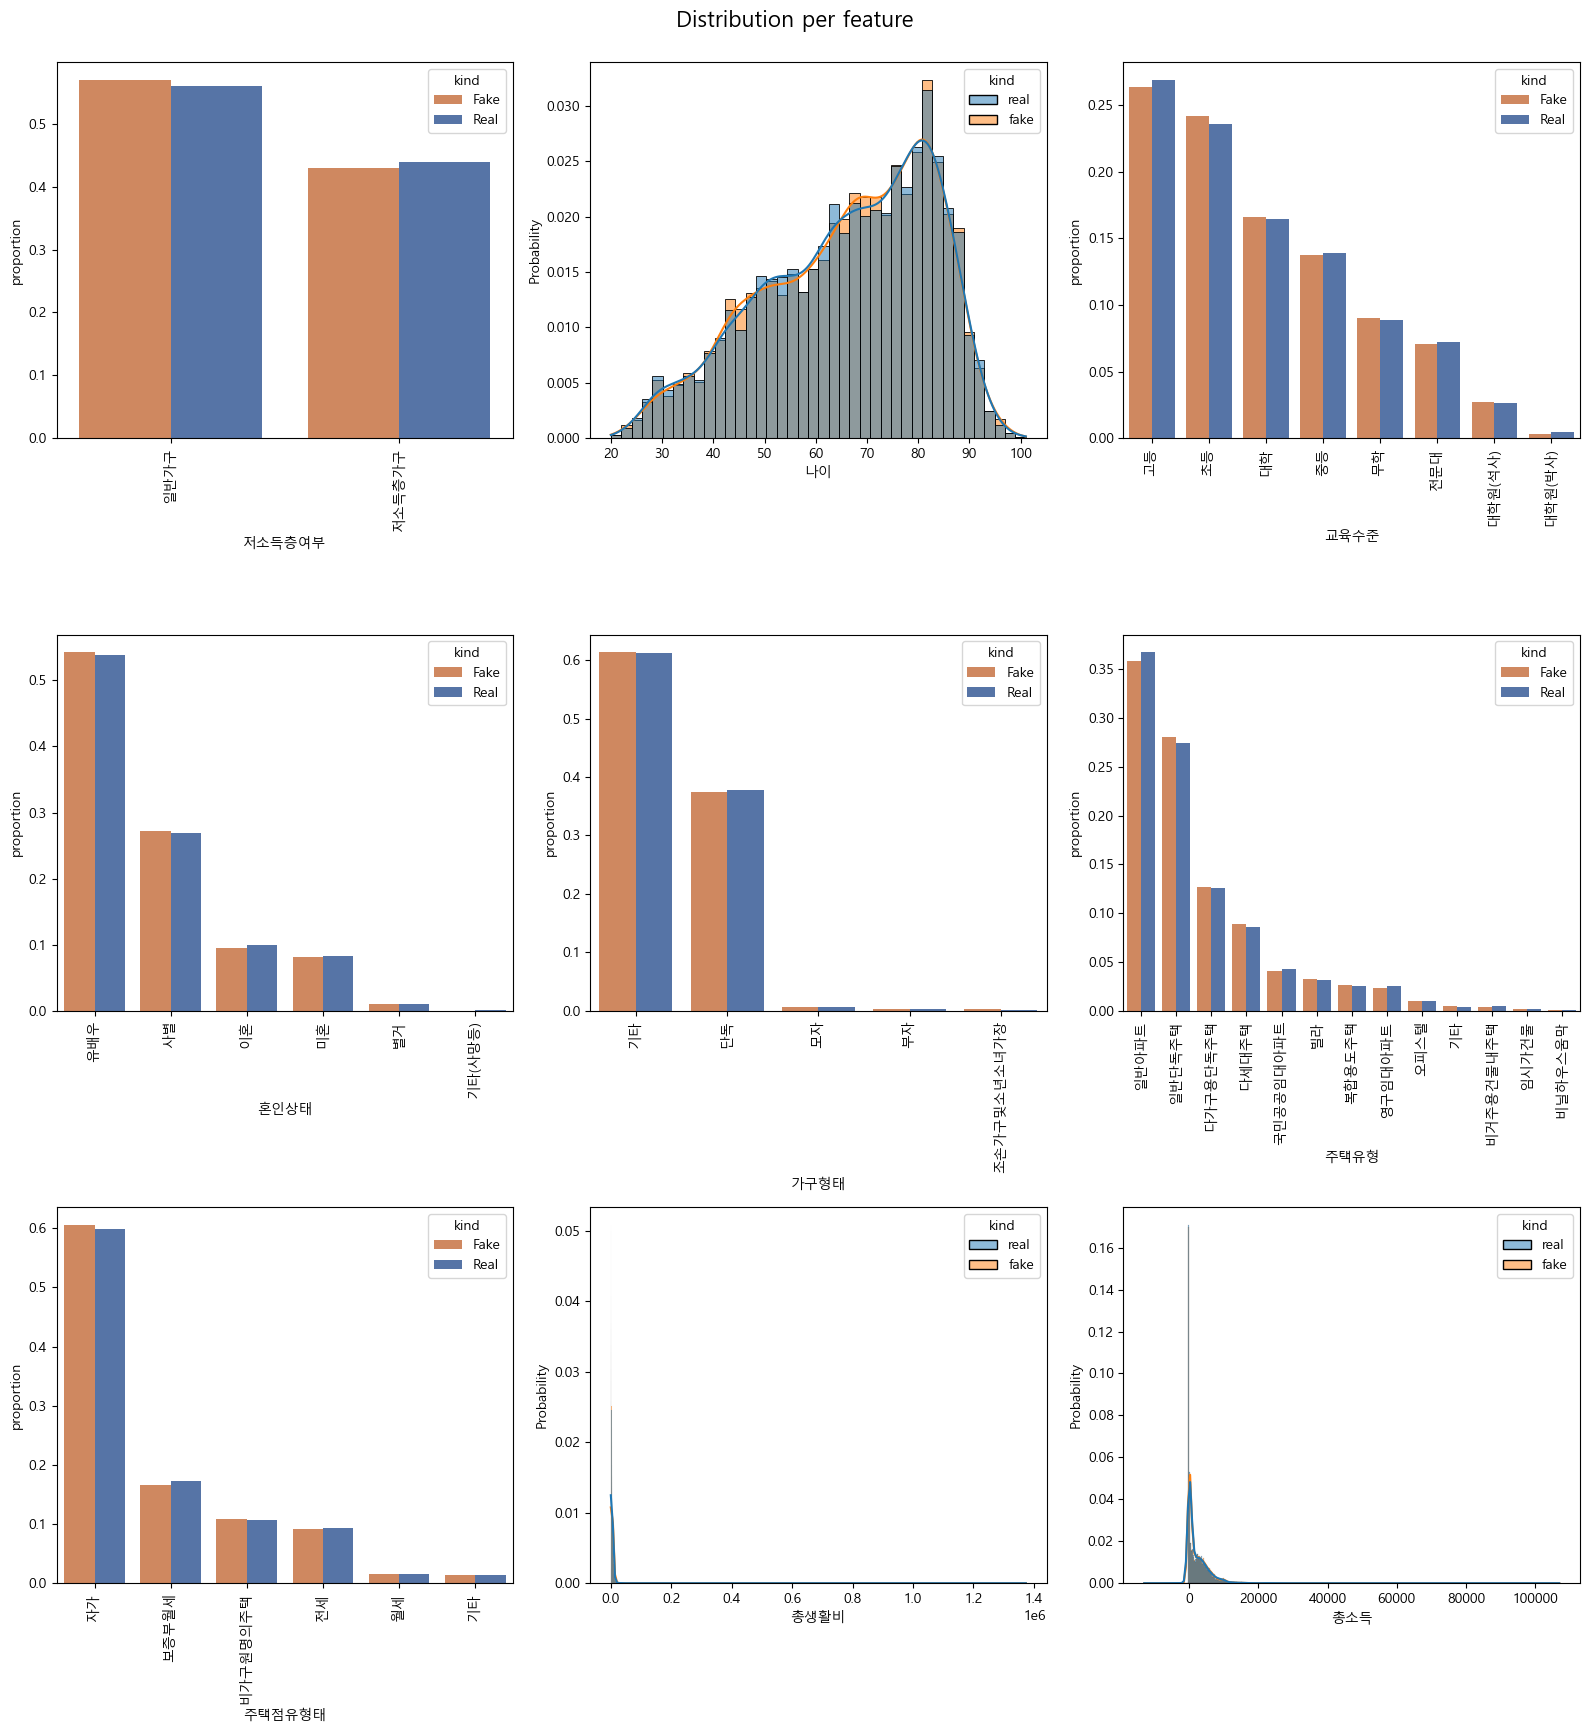

C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


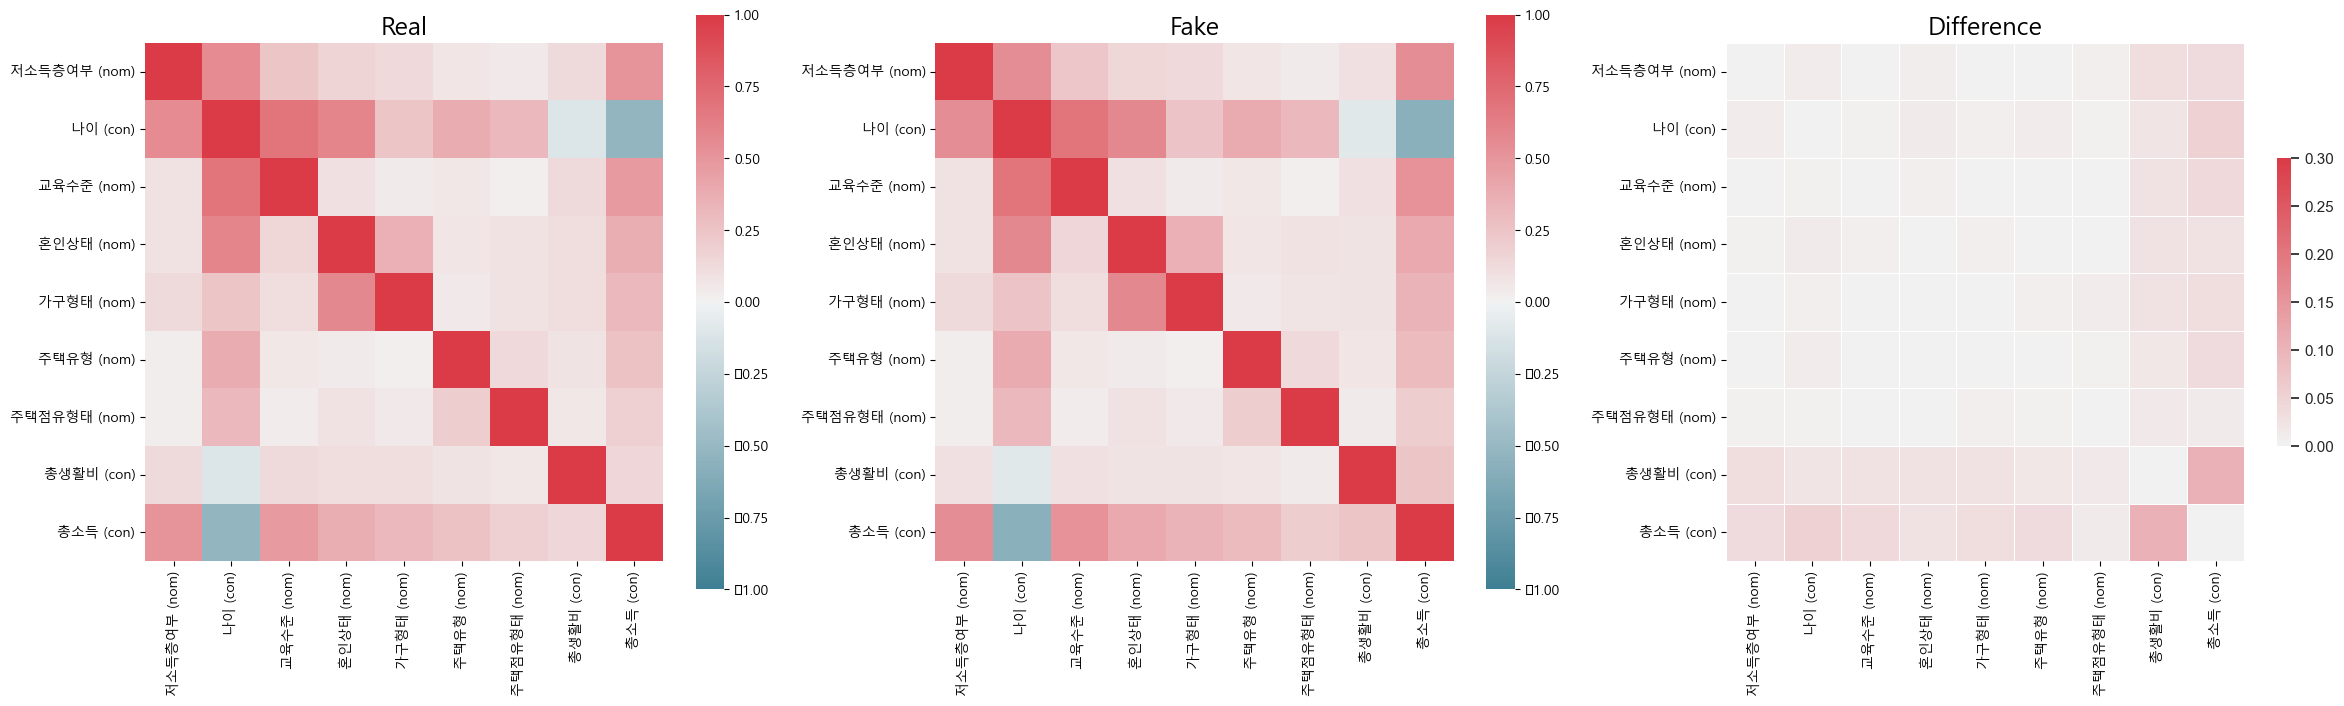

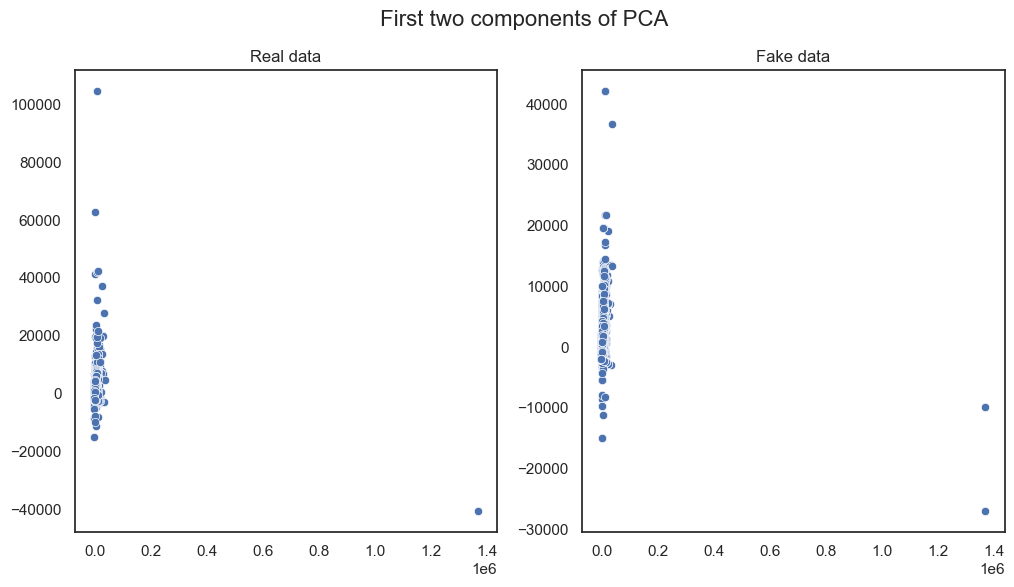

In [42]:
categorical_features = [
    '저소득층여부',
    '교육수준',
    '혼인상태',
    '가구형태',
    '주택유형',
    '주택점유형태'
]

table_evaluator =  TableEvaluator(raw, synthetic_data, cat_cols= categorical_features)
table_evaluator.visual_evaluation()

In [43]:
from sdmetrics.reports.single_table import QualityReport

In [44]:
report = QualityReport()

In [45]:
metadata = {
    #"primary_key": "user_id",
    "columns": {
        "저소득층여부": {
            "sdtype": "object",
        },
        "나이": {
            "sdtype": "numerical"
        },
        "교육수준": {
            "sdtype": "categorical",
        }, 
        "혼인상태": {
            "sdtype": "categorical"
        },
        "가구형태": {
            "sdtype": "categorical"
        },
        "주택유형": {
            "sdtype": "categorical"
        },
        "주택점유형태": {
            "sdtype": "categorical"
        },
        "총생활비": {
            "sdtype": "numerical"
        },
        "총소득": {
            "sdtype": "numerical"
        }
    }
}

# 통계적 유사성

In [46]:
report.generate(raw, synthetic_data, metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|███████████████████████████████████████████| 36/36 [00:00<00:00, 64.20it/s]

Overall Quality Score: 90.03%

Properties:
- Column Shapes: 99.18%
- Column Pair Trends: 80.87%


# KStest and TVtest

In [47]:
report.get_details(property_name='Column Shapes')

,Column,Metric,Score
0,나이,KSComplement,0.992117
1,교육수준,TVComplement,0.990210
2,혼인상태,TVComplement,0.993388
3,가구형태,TVComplement,0.997711
4,주택유형,TVComplement,0.986141
5,주택점유형태,TVComplement,0.990973
6,총생활비,KSComplement,0.991863
7,총소득,KSComplement,0.992371


In [48]:
report.get_properties()

,Property,Score
0,Column Shapes,0.991847
1,Column Pair Trends,0.808681


# TCAP

In [49]:
from sdmetrics.single_table import CategoricalCAP

TCAP_score_1 = CategoricalCAP.compute(
    real_data=raw,
    synthetic_data=synthetic_data,
    key_fields=['나이'],
    sensitive_fields=['저소득층여부']
)

In [50]:
TCAP_score_1

0.3175650786866051

In [51]:
TCAP_score_2 = CategoricalCAP.compute(
    real_data=raw,
    synthetic_data=synthetic_data,
    key_fields=['나이'],
    sensitive_fields=['저소득층여부', '총소득']
)

In [52]:
TCAP_score_2

0.872620932629918

# pMSE

In [53]:
def pMSE(real, fake):
    
    real['target'] = 0
    fake['target'] = 1

    merge = pd.concat([real, fake])
    # 학습데이터, taget 분리
    X = merge.drop(['target'], axis = 1)
    Y = merge['target']

    # 범주형 변수 One-hot Encoding, 수치형 변수는 Scaling
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import OneHotEncoder

    cate_X = merge[['저소득층여부','교육수준','혼인상태','가구형태','주택유형','주택점유형태','가구서비스','노인서비스','아동서비스']]
    conti_X = merge[['나이','총생활비','총소득']]

    cate_X_dummy=pd.get_dummies(cate_X)

    scaler_X=StandardScaler()
    conti_X_st=scaler_X.fit_transform(conti_X)

    conti_X_st=pd.DataFrame(conti_X_st, columns=conti_X.columns)

    cate_X_dummy.reset_index(inplace=True, drop=True)
    conti_X_st.reset_index(inplace=True, drop=True)
    Y.reset_index(inplace=True, drop=True)

    # train set
    train_set=pd.concat([conti_X_st,cate_X_dummy, Y], axis=1)
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    
    #Logistic Reggression
    model_log = LogisticRegression(penalty = 'l2', solver='saga', random_state=0) 
    model_log.fit(train_set, Y) # 모델 학습

    y_pred= model_log.predict_proba(train_set) # 예측 라벨

    s = 0
    n0 = len(real)
    n1 = len(fake)
    for score in y_pred:
        s+= (score[0] - (n1/(n0+n1)))**2

    pMSE_logistic = s*(1/(n0+n1))

    #RandomForest
    model_rf = RandomForestClassifier(random_state=0) 
    model_rf.fit(train_set, Y) # 모델 학습

    y_pred= model_rf.predict_proba(train_set) # 예측 라벨

    s = 0
    n0 = len(real)
    n1 = len(fake)
    for score in y_pred:
        s+= (score[0] - (n1/(n0+n1)))**2

    pMSE_rf = s*(1/(n0+n1))

    #SVM
    model_svc = SVC(kernel = 'rbf', probability=True)
    model_svc.fit(train_set, Y) # 모델 학습

    y_pred= model_svc.predict_proba(train_set) # 예측 라벨

    s = 0
    n0 = len(real)
    n1 = len(fake)
    for score in y_pred:
        s+= (score[0] - (n1/(n0+n1)))**2

    pMSE_svm = s*(1/(n0+n1))

    #3가지 분류기 평균값 도출
    pMSE = (pMSE_logistic + pMSE_rf + pMSE_svm)/3
    
    return pMSE

In [54]:
synthpop_pMSE = pMSE(raw, synthetic_data)

synthpop_pMSE

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.24475328875615168

In [ ]:
synthetic_data.to_csv('synthpop_genetate.csv', encoding='UTF-8-sig')